In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import scipy

from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error,mean_squared_error


# DataSet

In [ ]:
df = pd.read_csv('Ames_missing_values_removed.csv')
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [ ]:
X.shape

(2928, 79)

In [ ]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2923    142500
2924    131000
2925    132000
2926    170000
2927    188000
Name: SalePrice, Length: 2928, dtype: int64

# Custom Function :

###### Steps : 
- Train test split and normalization
- Calculate MAE,RMSE,R2
- Residual plot and QQ plot

In [ ]:
def ModelTraining(model,X,y,control='No'):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

    # Scaling to min-max (0-1 range)
    Scaler = MinMaxScaler()
    Scaler.fit(X_train)
    X_train = Scaler.transform(X_train)
    X_test = Scaler.transform(X_test)

    model.fit(X_train,y_train)
    
    if control == 'Yes':
        print(model.best_estimator_)
    else:
        pass
    
    y_pred = model.predict(X_test)
    
    try:
        print('Original value')
        print("MAE : ",mean_absolute_error(np.exp(y_test),np.exp(y_pred)))
        print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
    except:
        print("Log transformed")
        print("MAE : ",mean_absolute_error(y_test,y_pred))
        print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
        return 'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'
    finally:
        print('R2 Score :' , r2_score(y_test,y_pred))
        plt.plot(y_pred,y_test-y_pred,'o')
        plt.xlabel('True')
        plt.ylabel('Residual')
        plt.show() 
        scipy.stats.probplot(y_test-y_pred, dist="norm", plot=plt)
    
    

In [ ]:
X

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,0,5,141.0,31770,1,1,0,3,0,0,...,0,0,3,4,2,0,5,2010,9,4
1,0,4,80.0,11622,1,1,3,3,0,4,...,120,0,3,2,2,0,6,2010,9,4
2,0,5,81.0,14267,1,1,0,3,0,0,...,0,0,3,4,1,12500,6,2010,9,4
3,0,5,93.0,11160,1,1,3,3,0,0,...,0,0,3,4,2,0,4,2010,9,4
4,5,5,74.0,13830,1,1,0,3,0,4,...,0,0,3,2,2,0,3,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,8,5,37.0,7937,1,1,0,3,0,1,...,0,0,3,0,2,0,3,2006,9,4
2924,0,5,74.0,8885,1,1,0,2,0,4,...,0,0,3,2,2,0,6,2006,9,4
2925,9,5,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,4,700,7,2006,9,4
2926,0,5,77.0,10010,1,1,3,3,0,4,...,0,0,3,4,2,0,4,2006,9,4


## Linear Regression Model

Original value
Log transformed
MAE :  20066.46590585893
RMSE : 35295.17618009733
R2 Score : 0.8050622598161181


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


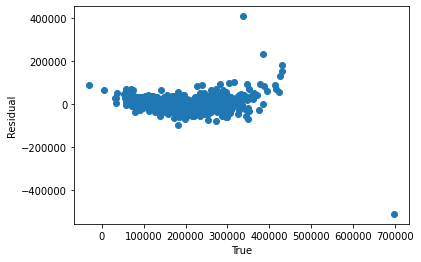

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

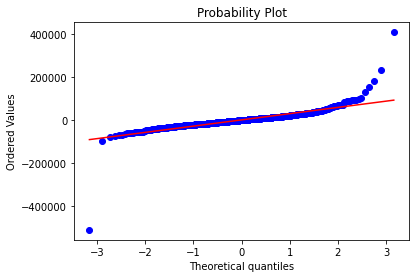

In [ ]:
model = LinearRegression()
ModelTraining(model,X,y,'No')

## Lasso (L1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.438e+09, tolerance: 1.071e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+09, tolerance: 1.047e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Lasso(alpha=0.1, random_state=101)
Original value
Log transformed
MAE :  19988.617670937238
RMSE : 34624.52246746122
R2 Score : 0.8124000130080143


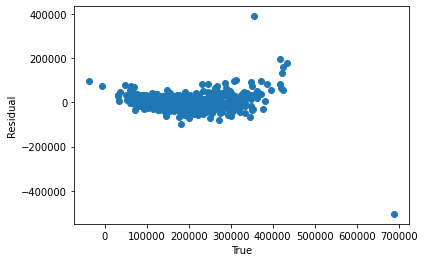

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

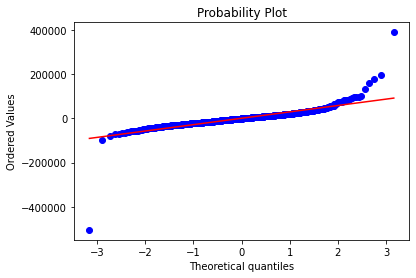

In [ ]:
model = Lasso(random_state=101)
param_grid={'alpha': [0.1, 0.09, 0.04, 0.05, 0.07, 0.004]}
gridModel = GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=5,
                         verbose=1)

ModelTraining(gridModel,X,y,'Yes')

## Ridge (L2)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Ridge(alpha=1)
Original value
Log transformed
MAE :  19476.814531000862
RMSE : 33428.53445256804
R2 Score : 0.8251362075730835


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


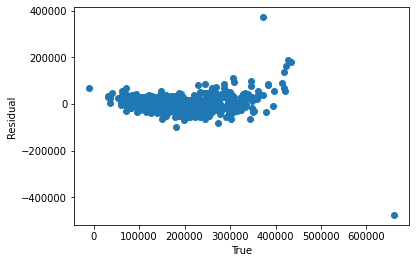

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

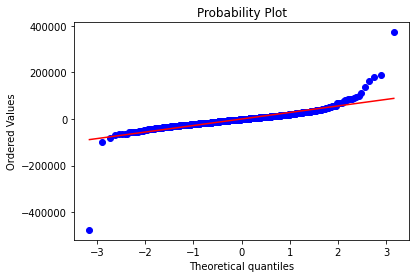

In [ ]:
model = Ridge()
param_grid = {'alpha':[.1,.2,.3,.9,1,5,9,10]}
gridModel = GridSearchCV(estimator=model,
                         param_grid=param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=10,
                        verbose=1)
ModelTraining(gridModel,X,y,'Yes')

## ElasticNet (L1 + L2)

ElasticNet(alpha=50, l1_ratio=1, tol=0.001)
Original value
Log transformed
MAE :  19042.853314030333
RMSE : 32428.977530137858
R2 Score : 0.8354371763273652


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


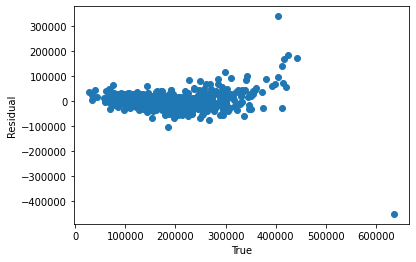

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

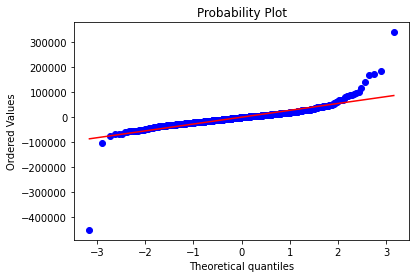

In [ ]:
model = ElasticNet(tol=0.001)
param_grid = {'alpha':[0.1,0.2,0.3,0.08,0.06,50,100],'l1_ratio':[.1,.3,.5,.9,1]}
gridModel = GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_absolute_error',
                        cv=10,verbose=0)
ModelTraining(gridModel,X,y,'Yes')

## Support Vector Machine

Original value
Log transformed
MAE :  55769.083843897395
RMSE : 82877.08421605821
R2 Score : -0.07481605653225043


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


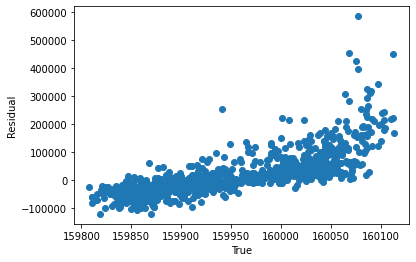

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

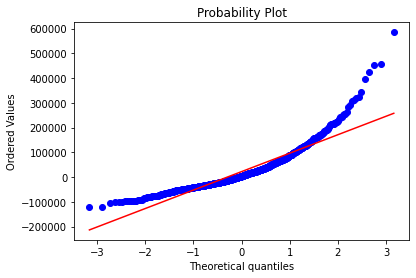

In [ ]:
model = SVR()
ModelTraining(model,X,y,'no')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [ ]:
varience = []
for comp in range(1,290):
    model = PCA(n_components=comp)
    model.fit(X_train)
    varience.append(np.sum(model.explained_variance_ratio_))
    
plt.plot(range(1,290),varience)

ValueError: ignored

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   1.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   1.0s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   0.9s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   0.8s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   1.0s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   0.6s
[CV] END .............C=5, degree=3, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .............C=5, degree=3, gamma=scale

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


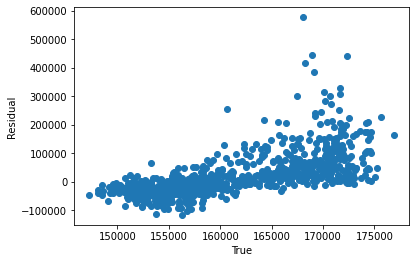

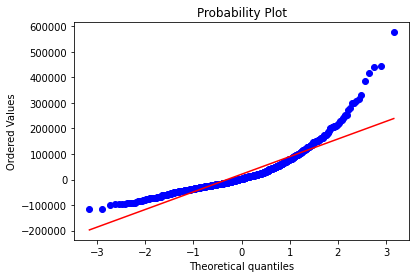

In [ ]:
model = SVR()
param = {'kernel':['rbf'],
    'degree':[3],
    'gamma':['scale','auto'],
    'C':[1.0,5,10,50,100]}

gridModel = GridSearchCV(estimator=model,param_grid=param,scoring='neg_mean_absolute_error',
                        cv=5,verbose=2)

# From above we can take 120 - 150 features instead of 290
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Scaling to min-max (0-1 range)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

pca = PCA(n_components=50)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test  = pca.transform(X_test)

gridModel.fit(pca_X_train,y_train)

y_pred = gridModel.predict(pca_X_test)

try:
    print('Original value')
    print("MAE : ",mean_absolute_error(np.exp(y_test),np.exp(y_pred)))
    print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
except:
    print("Log transformed")
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
finally:
    print('R2 Score :' , r2_score(y_test,y_pred))
    plt.plot(y_pred,y_test-y_pred,'o')
    plt.xlabel('True')
    plt.ylabel('Residual')
    plt.show() 
    scipy.stats.probplot(y_test-y_pred, dist="norm", plot=plt)
    

## KKNeighborsRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Scaling to min-max (0-1 range)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

errors = []
for i in range(1,9):
    model = KNeighborsRegressor(i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))
    errors.append(error)

plt.plot(range(1,9),errors)
# 7 neighbours best 

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


ValueError: ignored

In [ ]:
model = KNeighborsRegressor(n_neighbors=7)
ModelTraining(model,X,y,'no')

Original value
Log transformed
MAE :  23366.901023890787
RMSE : 35143.17122435324
R2 Score : 0.8067377123340366


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


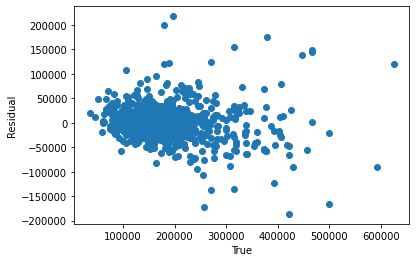

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

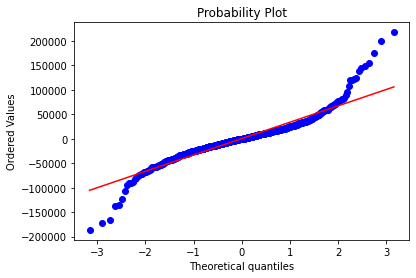

In [ ]:
model = DecisionTreeRegressor()
ModelTraining(model,X,y,'No')

## Decision Tree Regressor

DecisionTreeRegressor(max_depth=30, min_samples_leaf=6)
Original value
Log transformed
MAE :  21280.580362375586
RMSE : 31989.17831157308
R2 Score : 0.8398704848947542


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


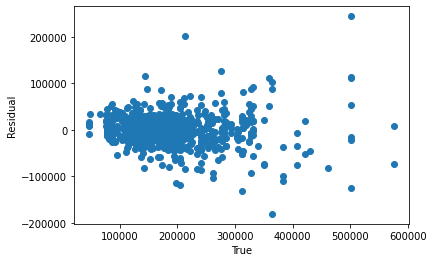

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

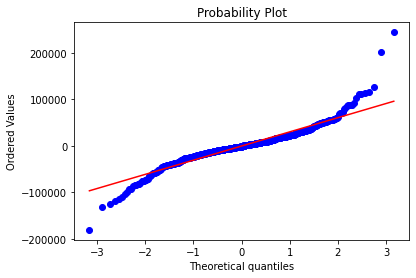

In [ ]:
model = DecisionTreeRegressor()
param_grid = { 'max_depth':[10,20,30],
    'min_samples_split':[2,3,4,7,10],
    'min_samples_leaf':[1,2,3,4,5,6,7]}

gridModel = GridSearchCV(model,param_grid=param_grid,scoring='neg_mean_absolute_error',
                        cv=10,verbose=0)
ModelTraining(gridModel,X,y,'Yes')

## Random Forest Regressor

Original value
Log transformed
MAE :  15944.549408418658
RMSE : 25659.2829495627
R2 Score : 0.8969722416430387


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


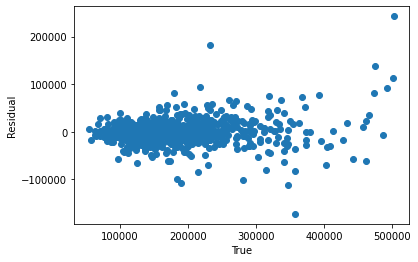

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

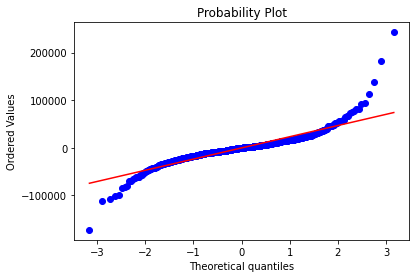

In [ ]:
model = RandomForestRegressor()
ModelTraining(model,X,y,'No')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................................n_estimators=100; total time=   4.5s
[CV] END ...................................n_estimators=100; total time=   4.5s
[CV] END ...................................n_estimators=100; total time=   4.5s
[CV] END ...................................n_estimators=100; total time=   4.4s
[CV] END ...................................n_estimators=100; total time=   4.4s
[CV] END ...................................n_estimators=120; total time=   5.4s
[CV] END ...................................n_estimators=120; total time=   5.4s
[CV] END ...................................n_estimators=120; total time=   5.4s
[CV] END ...................................n_estimators=120; total time=   5.3s
[CV] END ...................................n_estimators=120; total time=   5.3s
[CV] END ...................................n_estimators=130; total time=   5.8s
[CV] END ...................................n_est

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


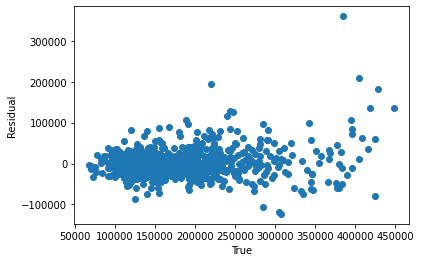

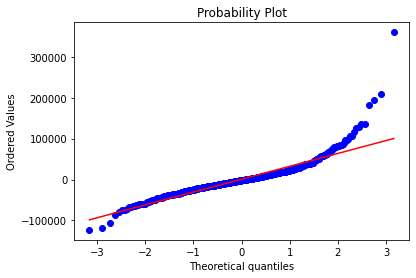

In [ ]:
model = RandomForestRegressor(random_state=101)
param_grid = { 'n_estimators':[100,120,130,140,150,200]}

gridModel = GridSearchCV(model,param_grid=param_grid,scoring='neg_mean_absolute_error',
                        cv=5,verbose=2)
gridModel.fit(pca_X_train,y_train)

y_pred = gridModel.predict(pca_X_test)

try:
    print('Original value')
    print("MAE : ",mean_absolute_error(np.exp(y_test),np.exp(y_pred)))
    print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
except:
    print("Log transformed")
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
finally:
    print('R2 Score :' , r2_score(y_test,y_pred))
    plt.plot(y_pred,y_test-y_pred,'o')
    plt.xlabel('True')
    plt.ylabel('Residual')
    plt.show() 
    scipy.stats.probplot(y_test-y_pred, dist="norm", plot=plt)
    

## Adaboost Regressor

Original value
Log transformed
MAE :  25712.504010771474
RMSE : 34489.77028377302
R2 Score : 0.81385737989969


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


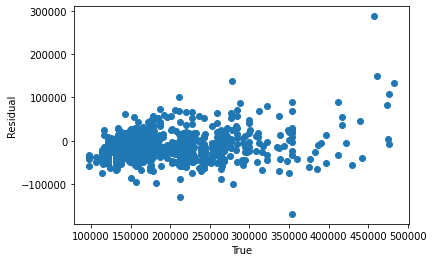

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

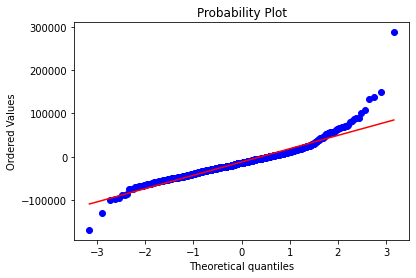

In [ ]:
model = AdaBoostRegressor()
ModelTraining(model,X,y,'No')

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.8s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.7s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.7s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.8s
[CV] END ................learning_rate=0.2, n_estimators=150; total time=   2.4s
[CV] END ................learning_rate=0.2, n_estimators=150; total time=   2.3s
[CV] END ................learning_rate=0.2, n_estimators=150; total time=   2.3s
[CV] END ................learning_rate=0.2, n_estimators=150; total time=   2.4s
[CV] END ................learning_rate=0.2, n_estimators=180; total time=   2.7s
[CV] END ................learning_rate=0.2, n_estimators=180; total time=   2.6s
[CV] END ................learning_rate=0.2, n_estimators=180; total time=   2.7s
[CV] END ................learning_rate=0.2, n_est

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


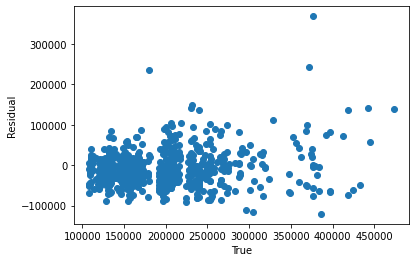

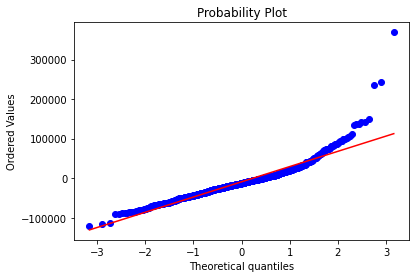

In [ ]:
model = AdaBoostRegressor()
param_grid = { 'learning_rate':[0.2,0.3],
    'n_estimators':[100,150,180,200]}


gridModel = GridSearchCV(model,param_grid=param_grid,scoring='neg_mean_absolute_error',
                        cv=4,verbose=2)
gridModel.fit(pca_X_train,y_train)

y_pred = gridModel.predict(pca_X_test)
print(gridModel.best_params_)

try:
    print('Original value')
    print("MAE : ",mean_absolute_error(np.exp(y_test),np.exp(y_pred)))
    print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
except:
    print("Log transformed")
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
finally:
    print('R2 Score :' , r2_score(y_test,y_pred))
    plt.plot(y_pred,y_test-y_pred,'o')
    plt.xlabel('True')
    plt.ylabel('Residual')
    plt.show() 
    scipy.stats.probplot(y_test-y_pred, dist="norm", plot=plt)
    

## Gradient Boost Regressor

Original value
Log transformed
MAE :  14841.333737566298
RMSE : 22177.064319264988
R2 Score : 0.9230385341089846


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


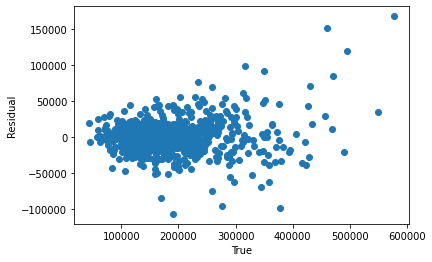

'overflow encountered in exp print(mean_absolute_error(np.exp(y_test),np.exp(y_pred)))'

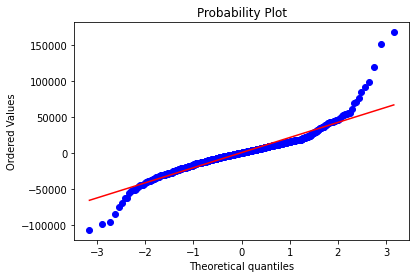

In [ ]:
model = GradientBoostingRegressor()
ModelTraining(model,X,y,'No')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   9.2s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=   9.1s
[CV] END ................learning_rate=0.1, n_estimators=400; total time=  10.0s
{'learning_rate': 0.1, 'n_estimators': 400}
Original value
Log transformed
MAE :  19797.937847863566
RMSE : 29427.276435501757
R2 Score : 0.8644918684701589


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


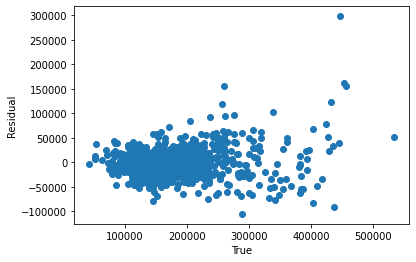

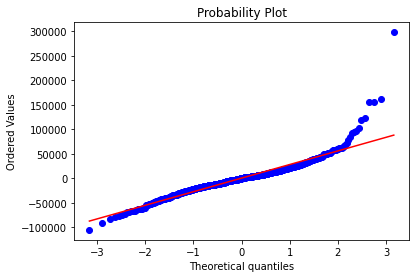

In [ ]:
model = GradientBoostingRegressor()
param_grid = { 'learning_rate':[0.1],
    'n_estimators':[400]}

gridModel = GridSearchCV(model,param_grid=param_grid,scoring='neg_mean_absolute_error',
                        cv=5,verbose=2)
gridModel.fit(pca_X_train,y_train)

y_pred = gridModel.predict(pca_X_test)
print(gridModel.best_params_)

try:
    print('Original value')
    print("MAE : ",mean_absolute_error(np.exp(y_test),np.exp(y_pred)))
    print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
except:
    print("Log transformed")
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
finally:
    print('R2 Score :' , r2_score(y_test,y_pred))
    plt.plot(y_pred,y_test-y_pred,'o')
    plt.xlabel('True')
    plt.ylabel('Residual')
    plt.show() 
    scipy.stats.probplot(y_test-y_pred, dist="norm", plot=plt)
    

## Final Model

In [ ]:
# From Above Training and testing of all the models 
# Ridge, Gradient boost, Support vector regressor,random forest
df = pd.read_csv('MainDataset')
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

Scaler = MinMaxScaler()

X = Scaler.fit_transform(X)
model = GradientBoostingRegressor()
model.fit(X,y)

In [ ]:
from joblib import dump
dump(model,'Advance_house_price.pkl')